In [2]:
#importing libraries for the data processing and model.
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from keras.models import load_model
%matplotlib inline


In [3]:
# defining the path and classes.
directory = 'C:\\Users\\zouhri\\a\\PFA\\imgs\\train'
test_directory = 'C:\\Users\\zouhri\\a\\PFA\\imgs\\test'

classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [4]:
# defining a shape to be used for our models.
img_size1 = 224
img_size2 = 224

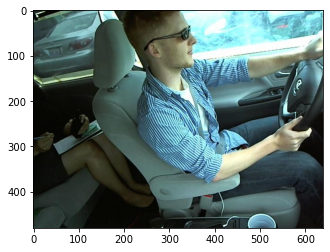

In [5]:
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

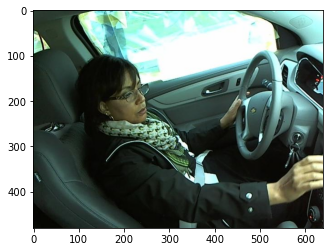

In [6]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break

In [7]:
# checkking image size using shape.
print(img_array.shape)

(480, 640, 3)


(224, 224, 3)


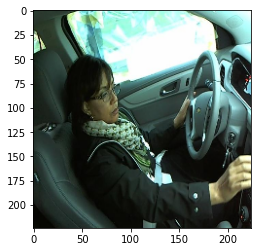

In [8]:
# trying out the resize image functionality
new_img = cv2.resize(test_array,(img_size1,img_size1))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [9]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img,(img_size1,img_size1))
            training_data.append([new_img,class_num])

In [10]:
create_training_data()

In [11]:
print(len(training_data))
random.shuffle(training_data)

22424


In [12]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

In [13]:
len(x),len(y)

(22424, 22424)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=50)



2


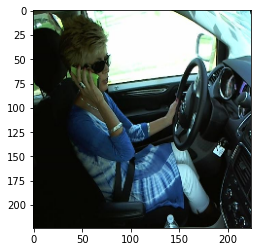

In [15]:
i = random.randint(1,2242) # select any random index from 1 to 22420
plt.imshow( x_train[i] )
print(y_train[i])

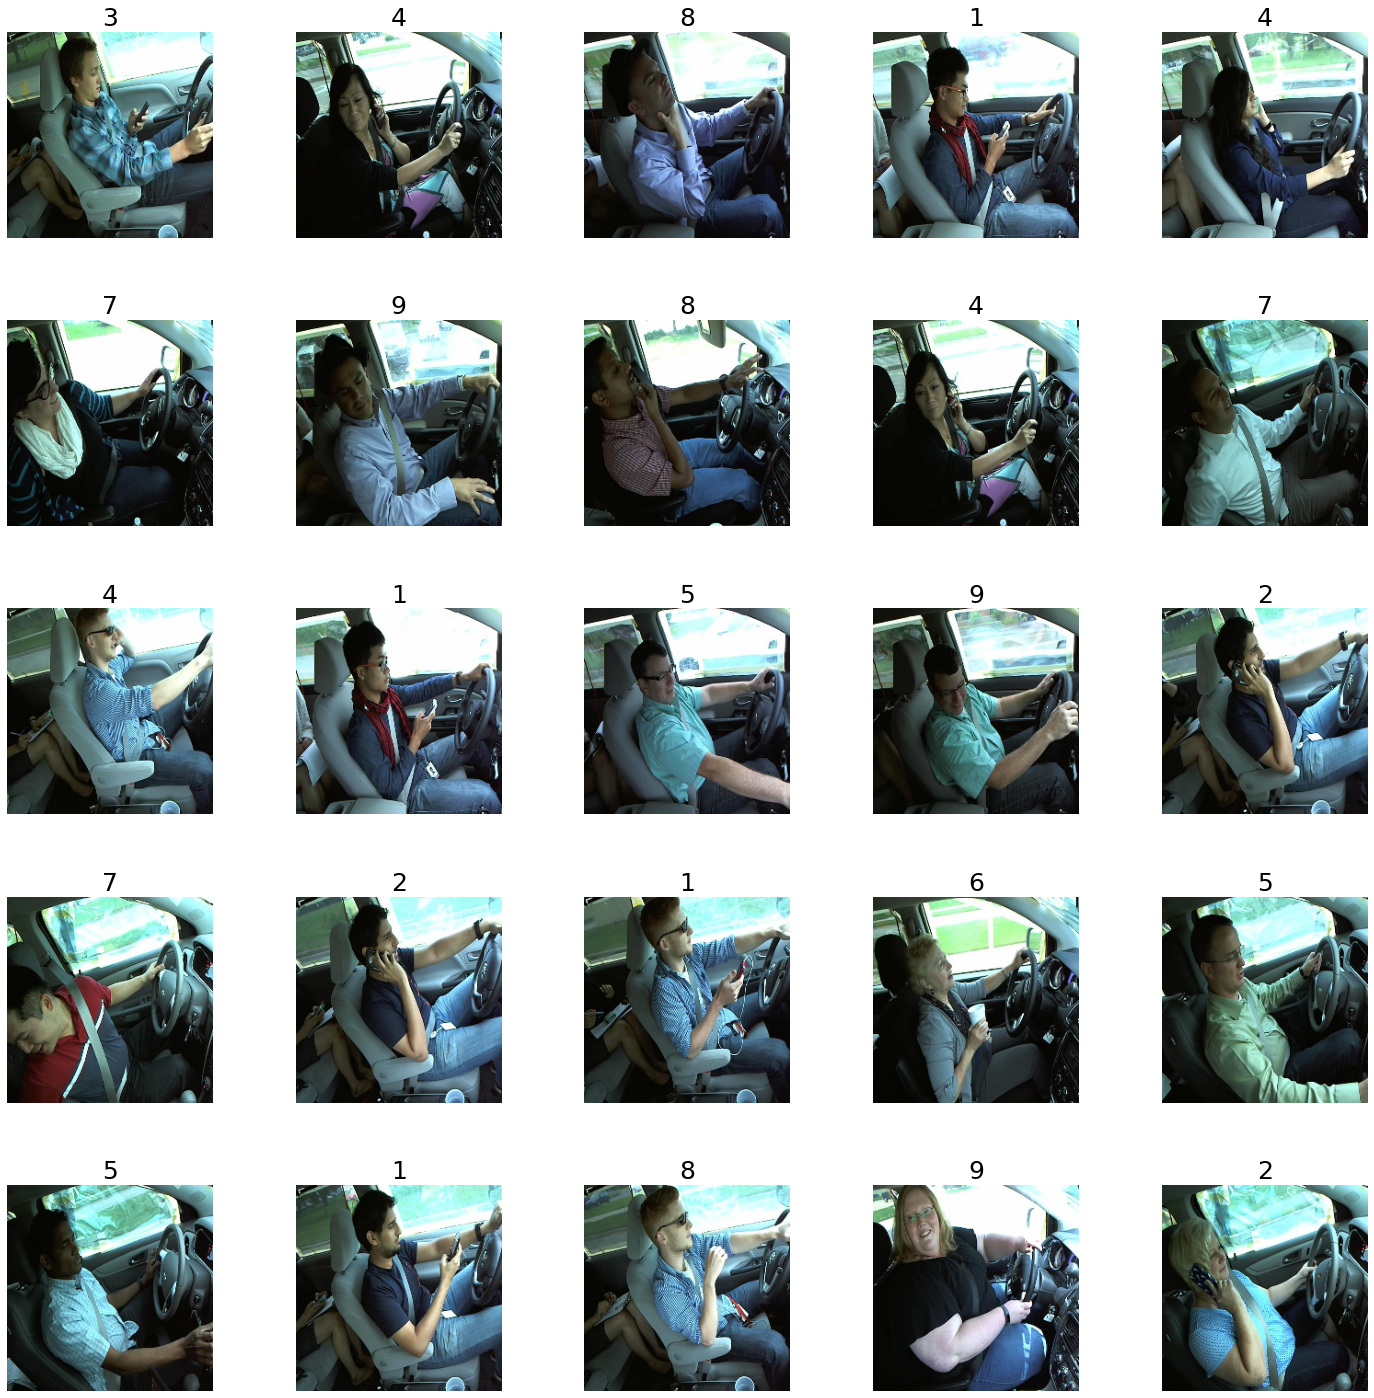

In [16]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( x_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [17]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


In [18]:
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

In [19]:
print (x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(5606, 224, 224, 3)
(5606, 10)
(16818, 224, 224, 3)
(16818, 10)


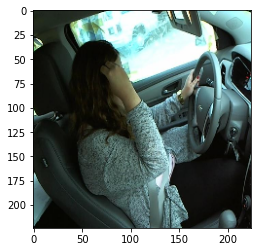

In [20]:
plt.imshow(x_train[3])

In [21]:
model = tf.keras.models.load_model('models/model10.h5')

In [22]:
test_directory = 'C:\\Users\\zouhri\\a\\PFA1\\imgs test\\test'

In [23]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
        new_img = cv2.resize(img_array,(img_size2,img_size1),3)
        testing_data.append([img,new_img])

In [24]:
create_testing_data()

In [25]:
print(len(testing_data))
random.shuffle(testing_data)

24


In [26]:
testing_data[1][1].shape

(224, 224, 3)

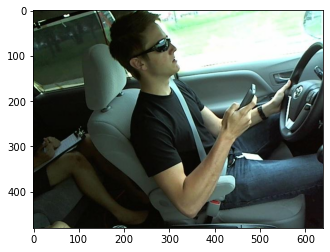

In [27]:
# Test class image for display.
testing_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break
    

In [28]:
a = []
for i in range(len(testing_data)):
    a.append(testing_data[i][1])

In [29]:
a= np.array(a)
a.shape

(24, 224, 224, 3)

In [30]:
activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

In [31]:
def plot_test_class1(model, a, image_number, color_type=3):
    img_brute = a[image_number]
    img_brute = cv2.resize(img_brute,(80,80))
    plt.imshow(img_brute,)

    new_img = img_brute.reshape(-1,80,80,color_type)

    y_prediction = model.predict(new_img, batch_size=50, verbose=1)
    print('Y prediction: {}'.format(y_prediction))
    print('Predicted: {}'.format(activity_map.get('c{}'.format(np.argmax(y_prediction)))))
    
    plt.show()

1/1 [==============================] - 0s 2ms/step
Y prediction: [[3.6561411e-02 5.1479079e-02 6.2724435e-01 3.7475867e-05 2.4773830e-04
  9.7376428e-04 3.6507004e-03 1.7388117e-02 2.5731343e-01 5.1039262e-03]]
Predicted: Talking on the phone - right


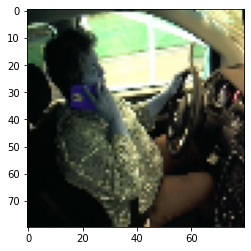

1/1 [==============================] - 0s 4ms/step
Y prediction: [[2.6818844e-07 1.0303736e-07 3.4387426e-08 1.2616488e-06 9.1819069e-10
  9.9999678e-01 1.8932305e-09 6.0687078e-10 4.6261378e-10 1.4948724e-06]]
Predicted: Operating the radio


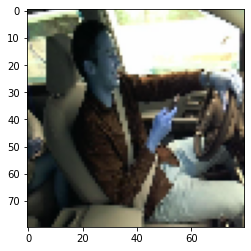

1/1 [==============================] - 0s 1ms/step
Y prediction: [[1.7379263e-05 2.9729097e-06 4.8909533e-07 2.1868994e-08 1.5450279e-08
  8.8740427e-07 1.7190169e-08 1.6444223e-07 1.6332545e-03 9.9834478e-01]]
Predicted: Talking to passenger


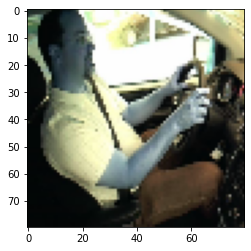

1/1 [==============================] - 0s 3ms/step
Y prediction: [[3.5563298e-03 1.2339174e-04 2.7313183e-05 4.2637549e-07 1.8703706e-05
  5.5731751e-05 1.6219050e-03 1.4294245e-05 1.8855587e-04 9.9439335e-01]]
Predicted: Talking to passenger


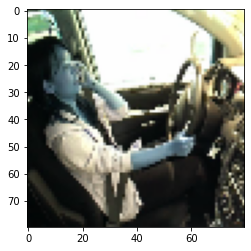

1/1 [==============================] - 0s 5ms/step
Y prediction: [[4.2462707e-04 2.5436110e-04 9.9710280e-01 9.2293858e-06 1.0960632e-04
  8.4270177e-05 4.5440721e-04 3.6929800e-05 1.4980580e-03 2.5714338e-05]]
Predicted: Talking on the phone - right


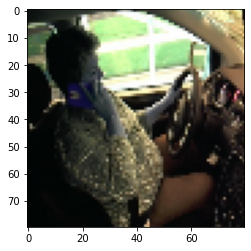

1/1 [==============================] - 0s 4ms/step
Y prediction: [[4.0901160e-01 1.2373674e-03 4.7063455e-04 6.9987886e-02 4.1746363e-01
  8.9549888e-03 1.4780015e-04 7.8873440e-05 3.6733802e-02 5.5913430e-02]]
Predicted: Talking on the phone - left


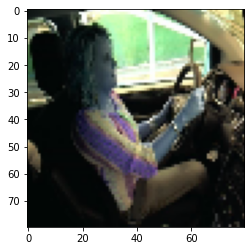

1/1 [==============================] - 0s 4ms/step
Y prediction: [[1.0771957e-09 6.7163565e-13 2.2267083e-10 7.2365991e-10 3.3349029e-10
  1.0000000e+00 5.0865796e-12 7.1144354e-11 5.9816641e-10 1.7242595e-08]]
Predicted: Operating the radio


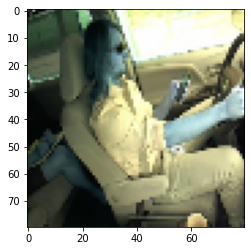

1/1 [==============================] - 0s 4ms/step
Y prediction: [[2.9504642e-01 4.9185324e-05 1.3640978e-04 1.8344592e-02 9.3079478e-05
  5.9413314e-01 3.9202747e-05 2.0653943e-05 3.6130745e-03 8.8524245e-02]]
Predicted: Operating the radio


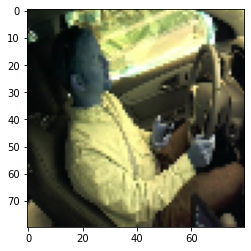

1/1 [==============================] - 0s 4ms/step
Y prediction: [[5.3425229e-01 1.0297844e-06 5.6741432e-05 8.5526874e-05 1.9631095e-03
  4.5157632e-01 1.6741031e-03 4.0937293e-06 6.9984708e-05 1.0316836e-02]]
Predicted: Safe driving


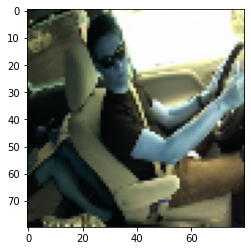

1/1 [==============================] - 0s 4ms/step
Y prediction: [[1.9189063e-04 4.5700472e-06 4.8456343e-08 4.2480361e-10 6.0274621e-09
  2.1520959e-08 1.8790743e-06 9.9979132e-01 1.6745147e-07 1.0139770e-05]]
Predicted: Reaching behind


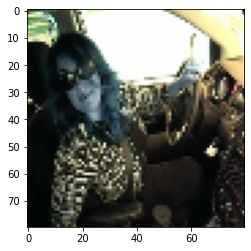

1/1 [==============================] - 0s 3ms/step
Y prediction: [[1.6650937e-03 1.9576255e-04 2.5070062e-01 3.7411742e-02 4.2131291e-05
  5.5912897e-02 4.1072351e-05 6.3294010e-06 5.0498378e-01 1.4904056e-01]]
Predicted: Hair and makeup


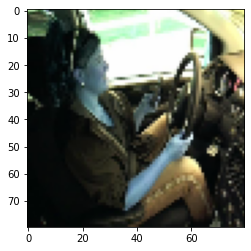

1/1 [==============================] - 0s 5ms/step
Y prediction: [[8.81206930e-01 1.74567833e-06 2.52397754e-03 2.31253216e-05
  4.13261514e-05 2.69677583e-03 1.51603029e-03 1.67805968e-06
  1.11955464e-01 3.28708738e-05]]
Predicted: Safe driving


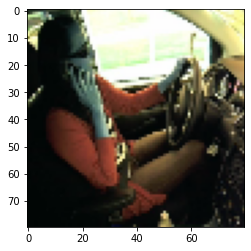

1/1 [==============================] - 0s 1ms/step
Y prediction: [[1.8359738e-03 9.2360341e-07 2.8357945e-06 3.6387901e-05 6.1436165e-02
  9.2579182e-03 4.0481484e-07 1.0196085e-04 5.9935528e-01 3.2797220e-01]]
Predicted: Hair and makeup


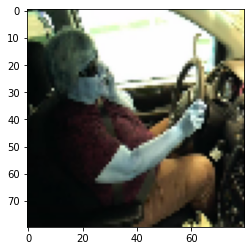

1/1 [==============================] - 0s 1ms/step
Y prediction: [[7.0987284e-01 1.0828902e-04 2.1028554e-03 6.4303115e-02 1.0853826e-01
  5.7395782e-02 6.4689601e-03 2.2004089e-05 1.5728962e-02 3.5458837e-02]]
Predicted: Safe driving


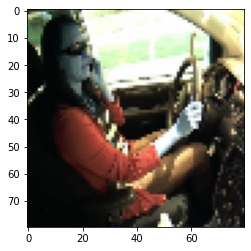

1/1 [==============================] - 0s 1ms/step
Y prediction: [[8.4436306e-04 4.8047191e-06 9.9200469e-01 2.8254727e-08 1.9607431e-07
  3.8894429e-03 5.7692494e-04 2.6214069e-08 2.6580810e-03 2.1347640e-05]]
Predicted: Talking on the phone - right


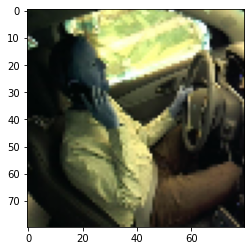

1/1 [==============================] - 0s 3ms/step
Y prediction: [[9.2922980e-01 3.0024421e-05 5.6177480e-05 7.0365313e-05 8.0149039e-06
  2.2449911e-02 4.2926066e-04 4.9967402e-06 5.1054242e-04 4.7211066e-02]]
Predicted: Safe driving


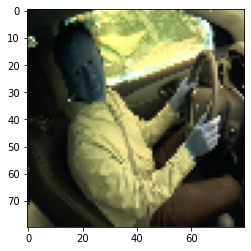

1/1 [==============================] - 0s 4ms/step
Y prediction: [[9.2400181e-01 5.8860320e-04 7.1785742e-08 1.4476429e-02 4.8374513e-05
  6.0600869e-02 6.8005738e-07 1.1123087e-06 4.5332965e-07 2.8155409e-04]]
Predicted: Safe driving


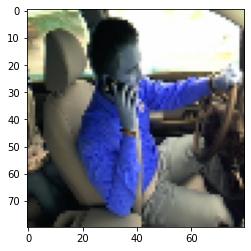

1/1 [==============================] - 0s 3ms/step
Y prediction: [[1.8507004e-01 4.0788370e-07 2.3861631e-07 1.2800997e-04 9.6827171e-05
  8.1454974e-01 1.2747248e-04 2.3736222e-06 2.1051189e-07 2.4737818e-05]]
Predicted: Operating the radio


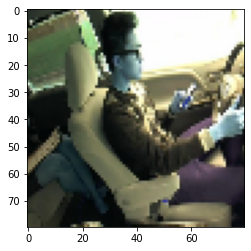

1/1 [==============================] - 0s 1ms/step
Y prediction: [[2.7654616e-02 2.4991579e-04 1.4845712e-05 8.1358469e-01 9.4226783e-04
  3.0917747e-02 3.7709696e-04 7.2230678e-06 1.5858284e-03 1.2466586e-01]]
Predicted: Texting - left


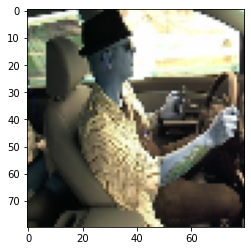

1/1 [==============================] - 0s 4ms/step
Y prediction: [[3.1600518e-07 1.6131042e-05 1.0637054e-05 1.3203928e-06 1.3009744e-03
  3.4044658e-06 6.5290107e-05 1.8340093e-06 7.1317476e-01 2.8542542e-01]]
Predicted: Hair and makeup


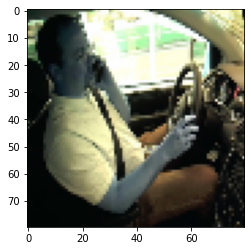

1/1 [==============================] - 0s 4ms/step
Y prediction: [[1.2507883e-01 3.8689141e-05 1.2758487e-06 2.3812501e-04 7.7131051e-07
  1.5327572e-04 1.9945883e-06 1.1540918e-06 5.6184133e-05 8.7442970e-01]]
Predicted: Talking to passenger


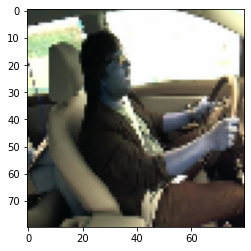

1/1 [==============================] - 0s 3ms/step
Y prediction: [[1.9045962e-01 5.9249955e-03 3.4708080e-03 8.8382624e-03 6.6568493e-04
  7.3300010e-01 3.4789737e-02 1.1285987e-03 4.5346012e-03 1.7187577e-02]]
Predicted: Operating the radio


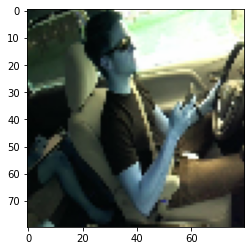

1/1 [==============================] - 0s 2ms/step
Y prediction: [[9.9262023e-01 7.5966036e-06 2.0584709e-03 4.5740975e-08 1.9553127e-08
  4.6062789e-05 4.2163904e-07 9.2244451e-04 4.0387088e-03 3.0595122e-04]]
Predicted: Safe driving


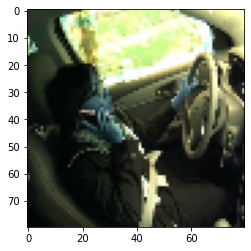

1/1 [==============================] - 0s 2ms/step
Y prediction: [[9.8099101e-01 1.9050140e-03 1.1778061e-05 3.8900216e-05 2.4994961e-05
  4.4485857e-03 5.8124780e-05 2.6966126e-03 3.5540896e-05 9.7893681e-03]]
Predicted: Safe driving


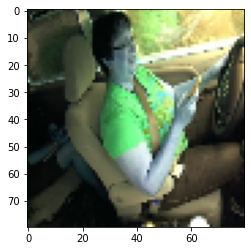

In [32]:
for i in range(len(a)):
    plot_test_class1(model, a, i,3)

In [33]:
def plot_test_class1(model, x_test, image_number, color_type=3):
    img_brute = x_test[image_number]
    img_brute = cv2.resize(img_brute,(80,80))
    plt.imshow(img_brute,)

    new_img = img_brute.reshape(-1,80,80,color_type)

    y_prediction = model.predict(new_img, batch_size=20, verbose=1)
    print('Y prediction: {}'.format(y_prediction))
    print('Predicted: {}'.format(activity_map.get('c{}'.format(np.argmax(y_prediction)))))
    
    plt.show()

1/1 [==============================] - 0s 1ms/step
Y prediction: [[6.7482286e-10 2.1935147e-09 2.3258833e-07 1.1259587e-13 1.7458861e-09
  6.5682865e-10 3.2619471e-05 7.5600485e-07 9.9996245e-01 3.9172032e-06]]
Predicted: Hair and makeup


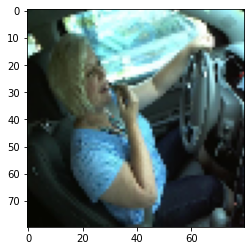

1/1 [==============================] - 0s 4ms/step
Y prediction: [[8.48844373e-09 5.50929137e-12 1.09956827e-11 5.36506150e-06
  9.99992609e-01 1.97166401e-06 1.04858774e-10 2.62104960e-09
  2.42083225e-08 1.23454544e-08]]
Predicted: Talking on the phone - left


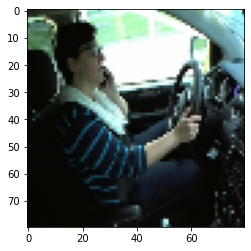

1/1 [==============================] - 0s 5ms/step
Y prediction: [[7.0976760e-08 1.6915634e-11 1.9051227e-10 8.5135807e-06 9.9998784e-01
  3.5957300e-06 2.3864599e-08 3.7081602e-09 1.4013862e-09 4.7005355e-09]]
Predicted: Talking on the phone - left


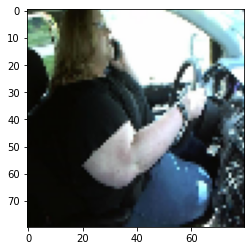

1/1 [==============================] - 0s 4ms/step
Y prediction: [[4.8662093e-07 1.8171315e-11 4.8902327e-11 1.3245275e-06 9.9999380e-01
  4.4464614e-06 9.8201447e-09 7.1312822e-10 1.5325339e-09 3.2827074e-08]]
Predicted: Talking on the phone - left


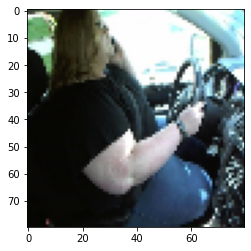

1/1 [==============================] - 0s 4ms/step
Y prediction: [[1.2589318e-09 7.2013458e-11 2.5528626e-08 6.3210315e-13 1.1908573e-10
  4.9977952e-08 4.3412798e-09 9.9999976e-01 1.2219338e-07 1.5451219e-10]]
Predicted: Reaching behind


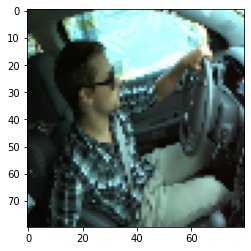

1/1 [==============================] - 0s 5ms/step
Y prediction: [[3.3926364e-10 7.2355682e-08 9.9999952e-01 2.1239233e-11 2.1008912e-09
  2.3345408e-09 1.5130725e-07 1.6702901e-09 2.1329849e-07 1.3071855e-09]]
Predicted: Talking on the phone - right


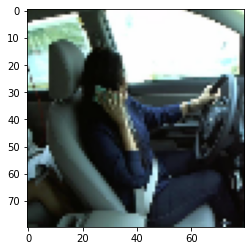

1/1 [==============================] - 0s 1ms/step
Y prediction: [[2.9714906e-10 9.9999940e-01 9.5132599e-08 1.4768546e-08 4.1807768e-12
  2.2909359e-10 4.4222315e-07 2.4463709e-10 1.0221833e-09 1.0107852e-09]]
Predicted: Texting - right


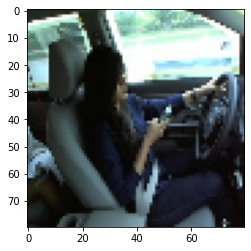

1/1 [==============================] - 0s 4ms/step
Y prediction: [[9.9999940e-01 2.3963626e-08 1.9223066e-11 2.9185752e-08 5.1527311e-09
  3.5959238e-09 4.7670742e-11 3.3549596e-10 1.4428855e-08 6.4219438e-07]]
Predicted: Safe driving


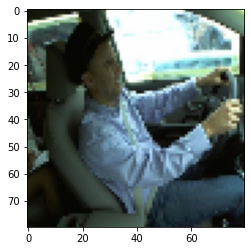

1/1 [==============================] - 0s 3ms/step
Y prediction: [[9.26774533e-07 9.99936342e-01 1.47099945e-05 3.75524360e-05
  7.58009051e-08 1.33586684e-06 3.11547956e-06 5.69982058e-06
  2.54280309e-07 5.26947659e-08]]
Predicted: Texting - right


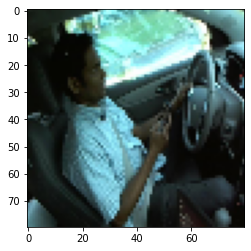

1/1 [==============================] - 0s 2ms/step
Y prediction: [[1.7647763e-12 3.3252315e-10 4.6933687e-06 2.5268594e-16 9.7387687e-10
  8.3198920e-11 9.9999487e-01 8.8054758e-11 4.7035871e-07 1.0287828e-11]]
Predicted: Drinking


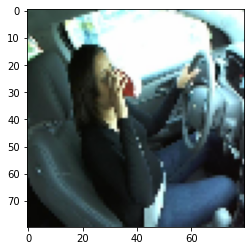

1/1 [==============================] - 0s 4ms/step
Y prediction: [[1.1219456e-04 3.6175473e-07 1.2802309e-06 1.8378993e-06 1.4389618e-04
  8.5093537e-03 1.2365642e-07 4.5494802e-05 6.9465692e-05 9.9111605e-01]]
Predicted: Talking to passenger


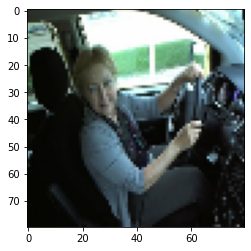

1/1 [==============================] - 0s 2ms/step
Y prediction: [[7.1068435e-08 9.7678303e-06 9.9997604e-01 4.8118135e-08 3.9993751e-07
  8.7200726e-07 1.7292382e-07 1.0223116e-05 2.2525094e-06 1.8139465e-07]]
Predicted: Talking on the phone - right


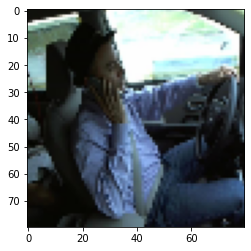

1/1 [==============================] - 0s 4ms/step
Y prediction: [[3.4022041e-09 1.3491069e-10 1.0765648e-13 9.9999988e-01 8.5065331e-08
  3.0870161e-11 1.2560376e-12 3.2186621e-12 8.9833652e-09 8.0571381e-09]]
Predicted: Texting - left


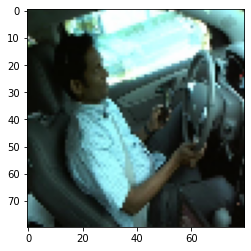

1/1 [==============================] - 0s 5ms/step
Y prediction: [[4.4289051e-04 5.5699573e-08 6.9004584e-09 1.4421339e-07 8.5373847e-07
  4.7243157e-05 4.6262787e-08 9.6907536e-07 1.5472747e-04 9.9935311e-01]]
Predicted: Talking to passenger


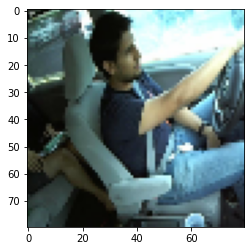

1/1 [==============================] - 0s 3ms/step
Y prediction: [[1.01646495e-11 1.00000000e+00 1.49659882e-10 1.41481838e-13
  1.20867088e-16 6.87376520e-14 5.69282399e-11 1.42176123e-11
  3.51746003e-13 7.42238519e-13]]
Predicted: Texting - right


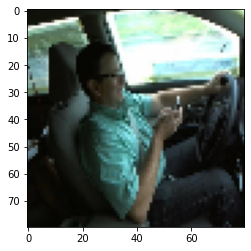

1/1 [==============================] - 0s 3ms/step
Y prediction: [[1.0000000e+00 3.7293690e-10 1.7155366e-12 3.9214573e-10 5.6039906e-10
  7.4468471e-09 1.0587420e-11 7.1355777e-12 2.1814855e-12 1.9545352e-08]]
Predicted: Safe driving


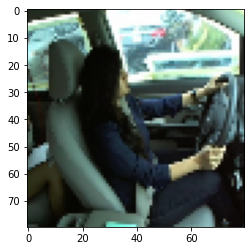

1/1 [==============================] - 0s 3ms/step
Y prediction: [[9.9988818e-01 3.8953394e-06 2.9270334e-06 1.6817519e-06 3.8590406e-06
  2.1159717e-06 5.5995748e-05 2.3035726e-07 5.6171043e-06 3.5373512e-05]]
Predicted: Safe driving


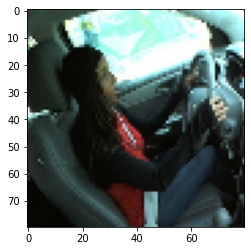

1/1 [==============================] - 0s 1ms/step
Y prediction: [[5.1315872e-09 2.8765523e-08 5.0319622e-06 7.3545180e-12 6.4268196e-10
  1.7580591e-08 5.0272774e-07 6.2217827e-05 9.9991775e-01 1.4415390e-05]]
Predicted: Hair and makeup


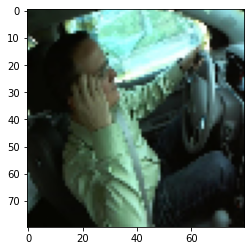

1/1 [==============================] - 0s 2ms/step
Y prediction: [[5.74534109e-09 9.99999881e-01 3.47435236e-09 1.06582076e-08
  1.48546041e-12 1.08214095e-07 1.33085489e-08 2.08289364e-09
  5.28162687e-11 2.49317178e-10]]
Predicted: Texting - right


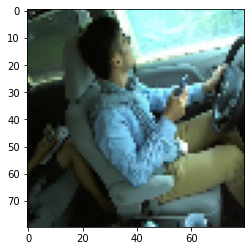

1/1 [==============================] - 0s 3ms/step
Y prediction: [[4.4776606e-13 9.7947417e-10 5.6973516e-08 2.3550089e-15 2.1241432e-11
  2.5970405e-11 1.0000000e+00 2.0813646e-13 2.5246763e-08 1.6354855e-11]]
Predicted: Drinking


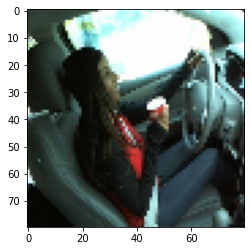

1/1 [==============================] - 0s 5ms/step
Y prediction: [[1.8408866e-07 4.8356195e-09 1.1630839e-09 6.5960473e-04 9.9920911e-01
  6.6101966e-05 3.4592400e-08 3.2120639e-07 2.4887320e-05 3.9782608e-05]]
Predicted: Talking on the phone - left


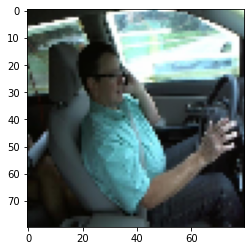

1/1 [==============================] - 0s 4ms/step
Y prediction: [[1.8756602e-11 9.9181750e-07 1.0426375e-06 2.5467133e-12 5.2193880e-09
  2.1977786e-09 9.9999523e-01 8.3473495e-10 2.7947381e-06 1.7020410e-09]]
Predicted: Drinking


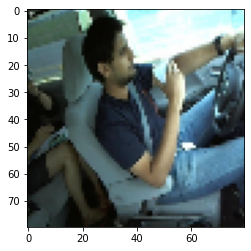

1/1 [==============================] - 0s 5ms/step
Y prediction: [[9.9983418e-01 5.1015920e-08 8.0248742e-12 2.5488056e-08 2.7732511e-10
  4.5872399e-09 7.4001291e-11 4.1007617e-08 9.0524999e-08 1.6567581e-04]]
Predicted: Safe driving


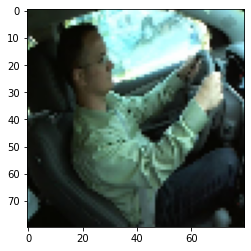

1/1 [==============================] - 0s 1ms/step
Y prediction: [[1.11881425e-04 1.95748754e-07 5.17474286e-09 9.97743487e-01
  1.13849355e-05 2.46826835e-06 1.12201546e-08 1.76229946e-07
  9.31722570e-06 2.12112488e-03]]
Predicted: Texting - left


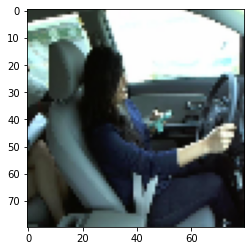

In [34]:
for i in range(len(a)):
    plot_test_class1(model, x_test, i,3)


In [35]:
print (x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(5606, 224, 224, 3)
(5606, 10)
(16818, 224, 224, 3)
(16818, 10)


In [159]:
## Defining the input

from keras.layers import Input
vgg16_input = Input(shape = (224, 224, 3), name = 'Image_input')


## The VGG model

from keras.applications.vgg16 import VGG16, preprocess_input

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_tensor = vgg16_input)
model_vgg16_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [185]:
#Use the generated model 
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras import optimizers

output_vgg16_conv = model_vgg16_conv(vgg16_input)

#Add the fully-connected layers 

x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

vgg16_pretrained = Model( vgg16_input,  x)
for layer in vgg16_pretrained.layers[:2]:
    layer.trainable=False
for layer in vgg16_pretrained.layers[2:]:
    layer.trainable=True


vgg16_pretrained_lastlayers = Model(vgg16_input, x)
vgg16_pretrained_lastlayers.summary()

# Compile CNN model
sgd = optimizers.SGD(lr = 0.001)
vgg16_pretrained_lastlayers.compile(loss='categorical_crossentropy',optimizer = sgd,metrics=['accuracy'])


ResourceExhaustedError: OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:RandomUniform]

In [184]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('vgg_weights_aug_lasttrained.hdf5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


datagen = ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(x_train, y_train, batch_size = 64)

# Fits the model on batches with real-time data augmentation:
vgg16_model = vgg16_pretrained_lastlayers.fit_generator(data_generator,steps_per_epoch = len(x_train) / 64, callbacks=[checkpointer, earlystopper],
                                                            epochs = 10, verbose = 1, validation_data = (x_test, y_test))


Epoch 1/10


TypeError: 'NoneType' object is not callable

In [179]:
print (x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(5606, 224, 224, 3)
(5606, 10, 2)
(16818, 224, 224, 3)
(16818, 10, 2)


In [183]:
len(x_train) / 56

300.32142857142856